In [30]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
import os
from glob import glob

In [31]:
train_dir = './dats/training/'
test_dir =  './dats/testing/'

In [32]:
leafCountUnique = glob(train_dir + '/*' )
numberOfClass = len(leafCountUnique)

In [37]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (100, 100, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))
# summary of the model
model.summary()

# configure the model for training by adding metrics
model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics = ['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
activation_20 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_21 (Activation)   (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 64)       

In [38]:
epochs = 500  
batch_size = 25

In [39]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= (100, 100),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= (100, 100),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 1300 images belonging to 100 classes.
Found 300 images belonging to 100 classes.


In [40]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 52 // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = 26 // batch_size)

Epoch 1/500
2/2 [==============================] - 1s 315ms/step - loss: 5.2451 - accuracy: 0.0000e+00 - val_loss: 4.6482 - val_accuracy: 0.0000e+00
Epoch 2/500
2/2 [==============================] - 0s 205ms/step - loss: 4.6730 - accuracy: 0.0000e+00 - val_loss: 4.6550 - val_accuracy: 0.0000e+00
Epoch 3/500
2/2 [==============================] - 0s 203ms/step - loss: 4.6322 - accuracy: 0.0200 - val_loss: 4.6889 - val_accuracy: 0.0000e+00
Epoch 4/500
2/2 [==============================] - 0s 202ms/step - loss: 4.6257 - accuracy: 0.0000e+00 - val_loss: 4.5768 - val_accuracy: 0.0400
Epoch 5/500
2/2 [==============================] - 0s 198ms/step - loss: 4.5681 - accuracy: 0.0200 - val_loss: 4.5875 - val_accuracy: 0.0000e+00
Epoch 6/500
2/2 [==============================] - 0s 194ms/step - loss: 4.6116 - accuracy: 0.0000e+00 - val_loss: 4.6192 - val_accuracy: 0.0000e+00
Epoch 7/500
2/2 [==============================] - 0s 209ms/step - loss: 4.5609 - accuracy: 0.0200 - val_loss: 4.5231 

2/2 [==============================] - 0s 211ms/step - loss: 3.4844 - accuracy: 0.2600 - val_loss: 3.1378 - val_accuracy: 0.2800
Epoch 59/500
2/2 [==============================] - 0s 204ms/step - loss: 3.5141 - accuracy: 0.1600 - val_loss: 3.7793 - val_accuracy: 0.1200
Epoch 60/500
2/2 [==============================] - 0s 215ms/step - loss: 3.7601 - accuracy: 0.1400 - val_loss: 3.3952 - val_accuracy: 0.2400
Epoch 61/500
2/2 [==============================] - 0s 248ms/step - loss: 3.5382 - accuracy: 0.0600 - val_loss: 3.1748 - val_accuracy: 0.2400
Epoch 62/500
2/2 [==============================] - 0s 228ms/step - loss: 3.2558 - accuracy: 0.2200 - val_loss: 3.2804 - val_accuracy: 0.3600
Epoch 63/500
2/2 [==============================] - 0s 234ms/step - loss: 3.7258 - accuracy: 0.1800 - val_loss: 3.2977 - val_accuracy: 0.2400
Epoch 64/500
2/2 [==============================] - 0s 215ms/step - loss: 3.5716 - accuracy: 0.2000 - val_loss: 2.7936 - val_accuracy: 0.3600
Epoch 65/500
2/2 [=

Epoch 116/500
2/2 [==============================] - 0s 217ms/step - loss: 3.1698 - accuracy: 0.3400 - val_loss: 2.8627 - val_accuracy: 0.2800
Epoch 117/500
2/2 [==============================] - 0s 215ms/step - loss: 2.9285 - accuracy: 0.2600 - val_loss: 2.9414 - val_accuracy: 0.2800
Epoch 118/500
2/2 [==============================] - 0s 227ms/step - loss: 3.3948 - accuracy: 0.1200 - val_loss: 2.5326 - val_accuracy: 0.3600
Epoch 119/500
2/2 [==============================] - 0s 197ms/step - loss: 3.4626 - accuracy: 0.2800 - val_loss: 2.8283 - val_accuracy: 0.3200
Epoch 120/500
2/2 [==============================] - 0s 210ms/step - loss: 2.9589 - accuracy: 0.3200 - val_loss: 3.0161 - val_accuracy: 0.3600
Epoch 121/500
2/2 [==============================] - 0s 206ms/step - loss: 3.1200 - accuracy: 0.2600 - val_loss: 2.2946 - val_accuracy: 0.3200
Epoch 122/500
2/2 [==============================] - 0s 213ms/step - loss: 2.8056 - accuracy: 0.3400 - val_loss: 2.4861 - val_accuracy: 0.3600

2/2 [==============================] - 0s 229ms/step - loss: 2.9502 - accuracy: 0.3400 - val_loss: 2.3788 - val_accuracy: 0.4000
Epoch 174/500
2/2 [==============================] - 0s 203ms/step - loss: 2.5511 - accuracy: 0.2400 - val_loss: 2.5021 - val_accuracy: 0.3200
Epoch 175/500
2/2 [==============================] - 0s 200ms/step - loss: 3.0657 - accuracy: 0.1800 - val_loss: 1.9863 - val_accuracy: 0.4400
Epoch 176/500
2/2 [==============================] - 0s 216ms/step - loss: 2.8917 - accuracy: 0.2800 - val_loss: 2.1593 - val_accuracy: 0.4000
Epoch 177/500
2/2 [==============================] - 0s 212ms/step - loss: 2.9008 - accuracy: 0.3400 - val_loss: 2.4681 - val_accuracy: 0.4400
Epoch 178/500
2/2 [==============================] - 0s 194ms/step - loss: 2.8506 - accuracy: 0.2200 - val_loss: 2.0474 - val_accuracy: 0.4800
Epoch 179/500
2/2 [==============================] - 0s 208ms/step - loss: 2.9023 - accuracy: 0.2600 - val_loss: 2.3779 - val_accuracy: 0.3600
Epoch 180/500

2/2 [==============================] - 0s 211ms/step - loss: 2.1232 - accuracy: 0.4400 - val_loss: 2.1242 - val_accuracy: 0.4800
Epoch 231/500
2/2 [==============================] - 0s 224ms/step - loss: 2.1924 - accuracy: 0.4200 - val_loss: 2.0834 - val_accuracy: 0.4400
Epoch 232/500
2/2 [==============================] - 0s 228ms/step - loss: 2.2502 - accuracy: 0.3800 - val_loss: 1.9442 - val_accuracy: 0.3600
Epoch 233/500
2/2 [==============================] - 0s 233ms/step - loss: 2.8424 - accuracy: 0.2600 - val_loss: 2.1562 - val_accuracy: 0.4800
Epoch 234/500
2/2 [==============================] - 0s 224ms/step - loss: 2.3104 - accuracy: 0.3600 - val_loss: 2.2629 - val_accuracy: 0.5200
Epoch 235/500
2/2 [==============================] - 0s 206ms/step - loss: 2.4569 - accuracy: 0.3600 - val_loss: 1.6884 - val_accuracy: 0.6000
Epoch 236/500
2/2 [==============================] - 0s 207ms/step - loss: 2.1327 - accuracy: 0.3800 - val_loss: 1.8787 - val_accuracy: 0.5200
Epoch 237/500

2/2 [==============================] - 0s 230ms/step - loss: 2.5901 - accuracy: 0.3000 - val_loss: 1.8340 - val_accuracy: 0.5200
Epoch 288/500
2/2 [==============================] - 0s 217ms/step - loss: 1.9958 - accuracy: 0.4400 - val_loss: 1.6163 - val_accuracy: 0.5200
Epoch 289/500
2/2 [==============================] - 0s 230ms/step - loss: 2.4707 - accuracy: 0.2800 - val_loss: 2.0234 - val_accuracy: 0.5600
Epoch 290/500
2/2 [==============================] - 0s 221ms/step - loss: 2.3100 - accuracy: 0.2600 - val_loss: 1.6247 - val_accuracy: 0.6000
Epoch 291/500
2/2 [==============================] - 0s 226ms/step - loss: 2.2533 - accuracy: 0.4000 - val_loss: 1.5602 - val_accuracy: 0.4400
Epoch 292/500
2/2 [==============================] - 0s 215ms/step - loss: 2.3286 - accuracy: 0.3600 - val_loss: 1.8914 - val_accuracy: 0.3600
Epoch 293/500
2/2 [==============================] - 0s 219ms/step - loss: 2.4459 - accuracy: 0.4600 - val_loss: 1.9719 - val_accuracy: 0.4000
Epoch 294/500

2/2 [==============================] - 0s 214ms/step - loss: 1.9061 - accuracy: 0.5000 - val_loss: 1.9066 - val_accuracy: 0.4400
Epoch 345/500
2/2 [==============================] - 0s 221ms/step - loss: 2.0029 - accuracy: 0.4200 - val_loss: 1.5844 - val_accuracy: 0.5200
Epoch 346/500
2/2 [==============================] - 0s 233ms/step - loss: 2.3587 - accuracy: 0.3000 - val_loss: 1.6603 - val_accuracy: 0.3600
Epoch 347/500
2/2 [==============================] - 1s 254ms/step - loss: 1.9746 - accuracy: 0.4200 - val_loss: 1.7088 - val_accuracy: 0.4000
Epoch 348/500
2/2 [==============================] - 0s 247ms/step - loss: 2.1610 - accuracy: 0.4000 - val_loss: 2.2207 - val_accuracy: 0.3200
Epoch 349/500
2/2 [==============================] - 0s 243ms/step - loss: 1.6201 - accuracy: 0.5800 - val_loss: 1.8548 - val_accuracy: 0.4800
Epoch 350/500
2/2 [==============================] - 0s 229ms/step - loss: 1.8774 - accuracy: 0.4600 - val_loss: 1.5867 - val_accuracy: 0.6400
Epoch 351/500

2/2 [==============================] - 0s 235ms/step - loss: 1.6227 - accuracy: 0.6000 - val_loss: 1.3140 - val_accuracy: 0.6400
Epoch 402/500
2/2 [==============================] - 0s 212ms/step - loss: 1.8495 - accuracy: 0.5000 - val_loss: 1.5248 - val_accuracy: 0.6000
Epoch 403/500
2/2 [==============================] - 0s 226ms/step - loss: 1.7538 - accuracy: 0.5600 - val_loss: 1.1566 - val_accuracy: 0.5200
Epoch 404/500
2/2 [==============================] - 0s 211ms/step - loss: 1.8658 - accuracy: 0.5200 - val_loss: 1.2182 - val_accuracy: 0.5600
Epoch 405/500
2/2 [==============================] - 0s 214ms/step - loss: 1.4825 - accuracy: 0.5600 - val_loss: 1.6408 - val_accuracy: 0.5200
Epoch 406/500
2/2 [==============================] - 0s 219ms/step - loss: 2.0604 - accuracy: 0.4600 - val_loss: 1.2834 - val_accuracy: 0.6800
Epoch 407/500
2/2 [==============================] - 0s 230ms/step - loss: 1.8235 - accuracy: 0.4800 - val_loss: 1.7672 - val_accuracy: 0.5200
Epoch 408/500

2/2 [==============================] - 0s 204ms/step - loss: 2.2403 - accuracy: 0.4000 - val_loss: 1.0124 - val_accuracy: 0.6400
Epoch 459/500
2/2 [==============================] - 0s 231ms/step - loss: 1.9951 - accuracy: 0.4400 - val_loss: 0.9970 - val_accuracy: 0.6400
Epoch 460/500
2/2 [==============================] - 0s 228ms/step - loss: 1.8587 - accuracy: 0.4200 - val_loss: 2.0286 - val_accuracy: 0.3600
Epoch 461/500
2/2 [==============================] - 0s 209ms/step - loss: 1.7260 - accuracy: 0.5000 - val_loss: 1.3639 - val_accuracy: 0.5600
Epoch 462/500
2/2 [==============================] - 0s 212ms/step - loss: 1.4555 - accuracy: 0.6000 - val_loss: 1.5479 - val_accuracy: 0.4800
Epoch 463/500
2/2 [==============================] - 0s 206ms/step - loss: 1.9032 - accuracy: 0.5000 - val_loss: 1.2942 - val_accuracy: 0.5600
Epoch 464/500
2/2 [==============================] - 0s 212ms/step - loss: 1.7198 - accuracy: 0.4800 - val_loss: 1.5023 - val_accuracy: 0.5600
Epoch 465/500

In [41]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

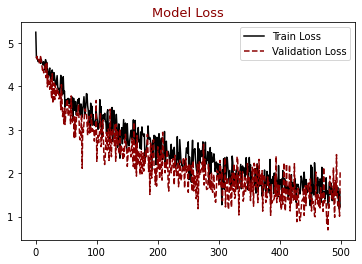

In [42]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

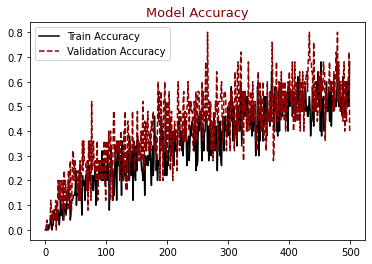

In [43]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

In [ ]:
export_dir = './saved_model/1'

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)

In [2]:
import cv2
# Set the image path
img_path = '1.jpg'
# Read the image
image = cv2.imread(img_path)
print(image.shape)

(555, 601, 3)
